In [195]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [205]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Key%20Macroeconomic%20Indicators.csv')
data = data.dropna()
data.shape

(678, 5)

In [206]:
data.head()

,DATE,UNRATE,CPIAUCSL,DFF,USRECM
1,01/01/1958,5.8,3.50560,2.72,1.0
2,01/02/1958,6.4,3.23741,1.67,1.0
3,01/03/1958,6.7,3.62527,1.20,1.0
4,01/04/1958,7.4,3.61618,1.26,1.0
5,01/05/1958,7.4,3.35714,0.63,0.0


In [210]:
features = data[['UNRATE','CPIAUCSL','DFF']]
labels = data['USRECM']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13, test_size=2)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [215]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.849
Test set score: 1.000


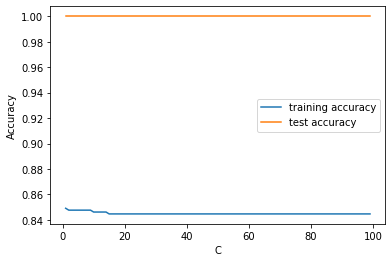

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

training_acc = []
test_acc = []

rango = range(1, 100)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()